In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy
import re
from datetime import date, datetime
import time

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from datetime import datetime
try:
    # jupyter_client >= 5, use tz-aware now
    from jupyter_client.session import utcnow as now
except ImportError:
    # jupyter_client < 5, use local now()
    now = datetime.now


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
from tqdm import tqdm

In [ ]:
tqdm.pandas()

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv('~/twitter_juul/input/userTimelineData.csv',lineterminator='\n', index_col=None)

In [ ]:
df

In [ ]:
# getting the dictionary for words for juul,,

In [ ]:
juul = [
    "juul"
    "vaping",
    "vapelife",
    "vapefam",
    "vapor",
    "vapenation",
    "vapers",
    "eliquid",
    "vapeon",
    "vapeshop",
    "vapecommunity",
    "vapeporn",    
]

In [ ]:
# getting the tweets for marijuana from external sources as the topic modelling didnt gave amny other topics 
# file uploaded in google gcp

In [ ]:
marijuana = pd.read_excel("/home/auppal8/Book1.xlsx",header=None)

In [ ]:
drug = marijuana[0].values

 #### In future might need to remove the promotion tweets from the normal user tweets...

In [ ]:
len((drug))

In [ ]:
# creating a pattern of the words and then applying on dataframe
pattern_juul = '|'.join(juul)

In [ ]:
%time
df_juul = df[df['tweetText'].str.contains(pattern_juul, case=False)]

In [ ]:
# similarly pattern for marijuana --takes considerable time
drug = set(drug)
pattern_mari = '|'.join(drug)
df_mari = df[df.tweetText.str.contains(pattern_mari, case = False)]

In [ ]:
pattern_mari

In [ ]:
len(df_juul)

In [ ]:
len(df_mari)
# total no of tweets is 525,342....

In [ ]:
# getting the users of the marijuana , getting the unique users
a = (df_mari.userID).unique()

In [ ]:
# getting the list of users unique..
len(list(a))

In [ ]:
len(set(a))

In [ ]:
# changing to datetime objects
df_mari['tweetCreatedAt'] = pd.to_datetime(df_mari.tweetCreatedAt)

In [ ]:
mari_users_time = df_mari.groupby(by = [df_mari['tweetCreatedAt'].dt.date])['userID'].agg({"user_id":pd.Series.nunique})


In [ ]:
mari_users_time

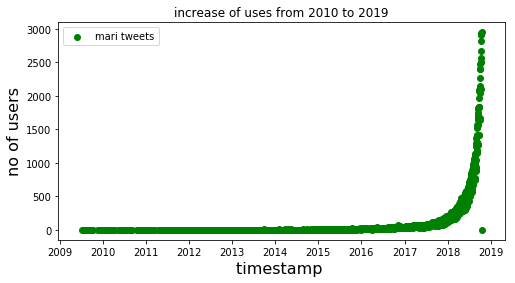

In [38]:
# plotting the tweet ids
plt.rcParams["figure.figsize"] = (8,4)
plt.scatter(list(mari_users_time.index),list(mari_users_time['user_id']),color = 'green', label='mari tweets')
plt.ylabel("no of users",fontsize=16)
plt.xlabel("timestamp ", fontsize = 16)
plt.title("increase of uses from 2010 to 2019")
plt.legend()
plt.show() 

In [ ]:
# convert to datetime
mari_users_time.index = pd.to_datetime(mari_users_time.index)

In [ ]:
(mari_users_time).index[0].year

In [ ]:
# zoom in from 2018
mari_users_2018 = mari_users_time.loc[mari_users_time.index.year >= 2017]  # change the value of year here

In [ ]:
# plotting the increase of unique marijuana users
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(list(mari_users_2018.index),list(mari_users_2018['user_id']),color = 'green', label='mari tweets')
plt.ylabel("no of users",fontsize=16)
plt.xlabel("timestamp ", fontsize = 16)
plt.title("original of uses from 2018 to current")
plt.legend()
plt.show() 

In [ ]:
mari_users = df_mari.groupby(df_mari['userID'])['tweetId'].agg(['count']).sort_values('count',ascending= False)

In [ ]:
mari_users_ = [str(user) for user in mari_users.index]

In [ ]:
# plotting the tweet ids
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(mari_users_[:900],list(mari_users['count'])[:900],color = 'green', label='mari tweets')
plt.ylabel("no of tweets",fontsize=16)
plt.xlabel("users ", fontsize = 16)
plt.legend()
plt.show() 

In [ ]:
(mari_users)

In [ ]:
# further grouping by the no of users
mari_users1 = pd.DataFrame(mari_users,columns=['count'],index=None)

In [ ]:
mari_users1['userID'] = mari_users1.index
mari_users1.columns = ['counts','userID']

In [ ]:
mari_users2 = mari_users1.groupby(mari_users1['counts'])['userID'].agg(['count']).sort_values('count',ascending=False)

In [ ]:
mari_users2.columns = ['tweets']

In [ ]:
(mari_users2).sort_index(inplace=True,ascending=True)

In [ ]:
mari_users2

In [ ]:
# plotting the tweet ids
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(mari_users2.index,list(mari_users2['tweets']),color = 'blue', label='marijuana tweets')
plt.ylabel("no of tweets",fontsize=16)
plt.xlabel("no of users ", fontsize = 16)
plt.legend()
plt.show()

In [ ]:
# checking for tweets

In [ ]:
# take a random sample of 30000
df_mari_s = df_mari.sample(30000)
df_juul_s = df_juul.sample(30000)

In [ ]:
df_mari['tweetCreatedAt'] = pd.to_datetime(df_mari.tweetCreatedAt)
df_juul['tweetCreatedAt'] = pd.to_datetime(df_juul.tweetCreatedAt)

In [ ]:
juul_dt =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])
mari_dt =  df_mari.groupby(df_mari['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(list(juul_dt.index),list(juul_dt['count']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt.index),list(mari_dt['count']), color = 'green', label = 'marijuana tweets')
plt.ylabel("no of tweets",fontsize=16)
plt.xlabel("time", fontsize = 16)
plt.legend()
plt.show() 

In [ ]:
## calculating with increase of user
juul_dt_u =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['userID'].unique.agg(['count'])
# juul_dt_u = df_juul.groupby("tweetCreatedAt").agg({"userID": pd.Series.nunique})

In [ ]:
mari_dt_u = df_mari.groupby("tweetCreatedAt").agg({"userID": pd.Series.nunique})

In [ ]:
juul_dt_u

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(list(juul_dt_u.index),list(juul_dt_u['userID']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt_u.index),list(mari_dt_u['userID']), color = 'green', label = 'marijuana tweets')
plt.ylabel("no of users",fontsize=16)
plt.xlabel("time", fontsize = 16)
plt.legend()
plt.show() 

###### Previous approach

In [ ]:
df_juul = df[df['tweetText'].str.contains("juul",case= False)]

In [ ]:
df_mari = df[df['tweetText'].str.contains("marijuana",case= False)] 

In [ ]:
len(df_juul)

In [ ]:
len(df_mari)

In [ ]:
# datetime_object = datetime.strptime(df_mari.tweetCreatedAt.iloc[0], '%Y-%m-%d %H:%M:%S')

In [ ]:
# ts = time.time()
# datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# changing to datetime objects
df_mari['tweetCreatedAt'] = pd.to_datetime(df_mari.tweetCreatedAt)

In [ ]:
df_juul['tweetCreatedAt'] = pd.to_datetime(df_juul.tweetCreatedAt)

In [ ]:
juul_dt =  df_juul.groupby(df_juul['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

In [ ]:
mari_dt =  df_mari.groupby(df_mari['tweetCreatedAt'].dt.date)['tweetCreatedAt'].agg(['count'])

In [ ]:
len(juul_dt)

In [ ]:
len(mari_dt)

In [ ]:
# only "juul" and "marijuana"
plt.plot(list(juul_dt.index),list(juul_dt['count']),color = 'blue', label='juul tweets')
plt.plot(list(mari_dt.index),list(mari_dt['count']), color = 'green', label = 'marijuana tweets')
plt.show() 

In [ ]:
### testing

In [ ]:
## check with no of users insatead of tweets-- less data in previous